# Exercises on Rigid Transforms

## Notebook Setup 
The following cell will install Drake, checkout the manipulation repository, and set up the path (only if necessary).
- On Google's Colaboratory, this **will take approximately two minutes** on the first time it runs (to provision the machine), but should only need to reinstall once every 12 hours.  

More details are available [here](http://manipulation.mit.edu/drake.html).

In [ ]:
import importlib
import os, sys
from urllib.request import urlretrieve

if 'google.colab' in sys.modules and importlib.util.find_spec('manipulation') is None:
    urlretrieve(f"http://manipulation.csail.mit.edu/scripts/setup/setup_manipulation_colab.py",
                "setup_manipulation_colab.py")
    from setup_manipulation_colab import setup_manipulation
    setup_manipulation(manipulation_sha='dc0eb8aa32e271d9b5299a84435694d0565346af', drake_version='20200909', drake_build='nightly')

In [ ]:
# python libraries
import numpy as np
import matplotlib.pyplot as plt, mpld3
from IPython.display import HTML, display

# Install pyngrok.
server_args = []
if 'google.colab' in sys.modules:
  server_args = ['--ngrok_http_tunnel']

# Start a single meshcat server instance to use for the remainder of this notebook.
from meshcat.servers.zmqserver import start_zmq_server_as_subprocess
proc, zmq_url, web_url = start_zmq_server_as_subprocess(server_args=server_args)

# Let's do all of our imports here, too.
import numpy as np
from pydrake.all import (Quaternion, RigidTransform, 
    RollPitchYaw, RotationMatrix
)

# Problem Description
In the lecture, we learned the basics of spatial transformations. In this exercise, you will compute simple rigid transforms applying the rules you have learned in class.

**These are the main steps of the exercise:**
1. Compute rigid transforms of frames in various reference frames.
2. Design grasp pose using spatial transformation

# Exercise on Rigid Transforms

As a brief review, we have covered two rules of spatial transformation in [class](http://manipulation.csail.mit.edu/pick.html#section3).
\begin{equation}{^AX^B} {^BX^C} =
      {^AX^C},\end{equation}
\begin{equation}[^AX^B]^{-1} =
      {^BX^A}.\end{equation}
      
Note that the rules of transforms are based on rules of transforming positions and rotations listed below. 

Addition of positions in the same frame:
\begin{equation}^Ap^B_F + ^Bp^C_F
      = ^Ap^C_F.\end{equation}

The additive inverse:
\begin{equation}^Ap^B_F = - ^Bp^A_F.\end{equation}

Rotation of a point:
\begin{equation}^Ap^B_G = {^GR^F} ^Ap^B_F.\end{equation}

Chaining rotations:
\begin{equation}{^AR^B} {^BR^C} = {^AR^C}.\end{equation}

Inverse of rotations:
\begin{equation}[^AR^B]^{-1} =
      {^BR^A}.\end{equation}
      
Applying these rules will yield the same result as the ones computed by the former two rules.

In Drake, you can multiply frames by 
```python
X_AB.multiply(X_BC)
```

You may also inverse a rigid transform by the [inverse](https://drake.mit.edu/pydrake/pydrake.math.html?highlight=rigidtransform#pydrake.math.RigidTransform_.RigidTransform_[float].inverse) method.

```python
X_AB.inverse()
```

Now suppose you have 4 frames, namely, the world frame, frame A, frame B, and frame C defined as below.

-- frame A expressed in the world frame (`X_WA`)

-- frame B expressed in frame A (`X_AB`)

-- frame B expressed in frame C (`X_CB`)

**Calcuate the following transforms by filling your code below in the designated functions.**

(1) `X_WB`, frame B expressed in the world frame

(2) `X_CW`, the world frame expressed in frame C

In [ ]:
def compute_X_WB(X_WA, X_AB, X_CB):
    """
    fill your code here
    """
    X_WB = RigidTransform()
    return X_WB

In [ ]:
def compute_X_CW(X_WA, X_AB, X_CB):
    """
    fill your code here
    """
    X_CW = RigidTransform()
    return X_CW

# Design Grasp Pose
The grasp pose is commonly defined in the object frame so that the grasp pose ${^OX^G}$ is independent of the pose of the object. The grasp pose in the world frame can be computed by 

\begin{equation}{{^WX^G} = {}{^W}X^{O}} {^OX^G},\end{equation}

where $W$ stands for the world frame and $G$ denotes the grasp frame, following the convention in the textbook. 

You should notice from the visualization below that the gripper frame is different from the world frame. In particular, the +y axis of the gripper frame points vertically downward, and the +z axis of the gripper points backward. This is an important observation for this exercise.

**Now for your exercise, dsign a grasp pose that satisfy the conditions below**

- **pick up the objectfrom top**
- **gripper's y axis should align with object's x axis**
- **gripper's x axis should align with object's z axis**
- **write grasp pose in the object frame and the world frame**

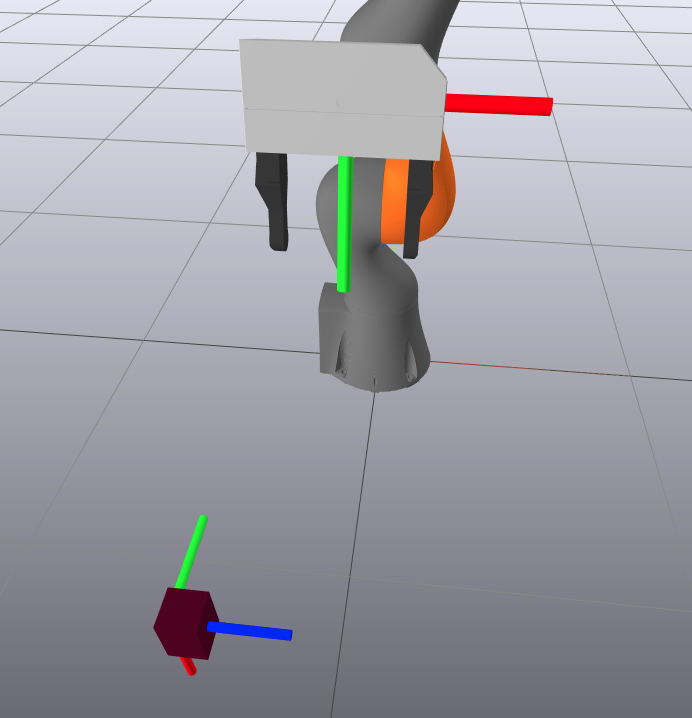


In [ ]:
p0_WO = [-0.2, -0.65, 0.12] # object in world frame
R0_WO = RotationMatrix.MakeYRotation(np.pi/2)
X_WO = RigidTransform(R0_WO, p0_WO)

In [ ]:
def design_grasp_pose(X_WO):
  """
  fill in our code below
  """
  X_OG = RigidTransform()
  X_WG = RigidTransform()
  return X_OG, X_WG

## How will this notebook be Graded?##

If you are enrolled in the class, this notebook will be graded using [Gradescope](www.gradescope.com). You should have gotten the enrollement code on our announcement in Piazza. 

For submission of this assignment, you must do two things. 
- Download and submit the notebook `rigid_transforms.ipynb` to Gradescope's notebook submission section, along with your notebook for the other problems.

We will evaluate the local functions in the notebook to see if the function behaves as we have expected. For this exercise, the rubric is as follows:
- [1 pts] `compute_X_WB` is correct
- [1 pts] `compute_X_CW` is correct
- [2 pts] `design_grasp_pose` is correct according to the requirement

In [ ]:
from manipulation.exercises.pick.test_rigid_transforms import TestRigidTransforms
from manipulation.exercises.grader import Grader 

Grader.grade_output([TestRigidTransforms], [locals()], 'results.json')
Grader.print_test_results('results.json')